In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/deepeshnathani/anaconda/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


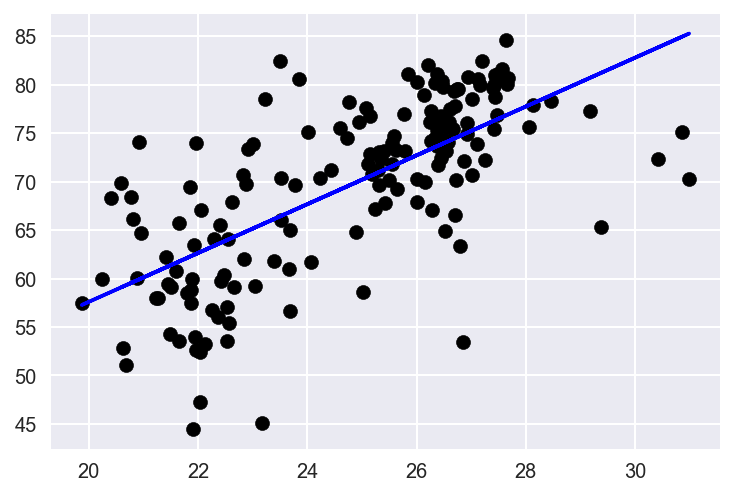

In [2]:
# Assign the dataframe to this variable.
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")
plt.scatter(bmi_life_data["BMI"], bmi_life_data["Life expectancy"], color = "black")

# Make and fit the linear regression model
total_rows = bmi_life_data.shape[0]
y = bmi_life_data["Life expectancy"].values.reshape(total_rows, 1)
X = bmi_life_data["BMI"].values.reshape(total_rows, 1)

bmi_life_model = LinearRegression()
bmi_life_model.fit(X, y)

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([21.07931])
plt.plot(X, bmi_life_model.predict(X), color = "blue")

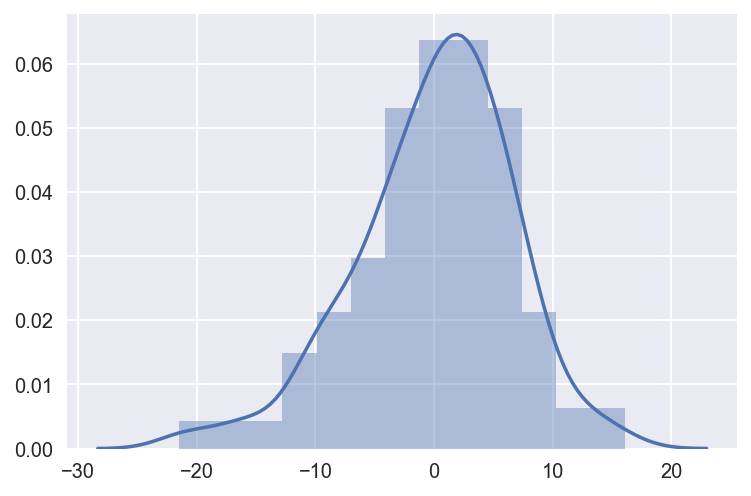

In [4]:
# Lets plot the error ditribution for the model (y_true - y_pred)
y_true = y
y_pred = bmi_life_model.predict(X)

sns.distplot(y_true - y_pred)